# 머신러닝06_ 사이킷런으로 수행하는 타이타닉 생존자 예측

In [ ]:
# https://www.kaggle.com/c/titanic/data

## 변수 별 정보

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
titanic_df=pd.read_csv('C:/Users/wnsgh/Desktop/지해 빅데이터 공부/0721_머신러닝_이경미교수님/01_code 실습/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
# 데이터 칼럼 타입 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Passengerid: 탑승자 데이터 일련번호
* survived: 생존 여부, 0 = 사망, 1 = 생존
* Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* sex: 탑승자 성별
* name: 탑승자 이름
* Age: 탑승자 나이
* sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
* parch: 같이 탑승한 부모님 또는 어린이 인원수
* ticket: 티켓 번호
* fare: 요금
* cabin: 선실 번호
* embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

### 결측치 파악

In [4]:
# 데이터 칼럼 타입 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##  데이터 전처리 : 결측치 처리

### NULL 컬럼들에 대한 처리

- 사이킷 머신러닝 알고리즘은 Null 값을 허용하지 않으므로
- Null 값을 어떻게 처리할지 결정
- DataFrame()의 fillna() 메서드를 사용해서 
- Null 값을 평균 또는 고정 값으로 변경
- Age : 평균 나이로 변경
- 나머지 칼럼 : 'N'으로 변경

In [5]:
# 널 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean, inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

titanic_df.isnull().sum() # 모든 칼럼의 Numll 값을 합산해서 널 값이 없는지 확인

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 문자열 변수(피처) 빈도 분포 확인: value_counts()

In [6]:
print('Sex분포 : \n', titanic_df['Sex'].value_counts())
print('Cabin분포 : \n', titanic_df['Cabin'].value_counts())
print('Embarked분포 : \n', titanic_df['Embarked'].value_counts())

Sex분포 : 
 male      577
female    314
Name: Sex, dtype: int64
Cabin분포 : 
 N              687
B96 B98          4
C23 C25 C27      4
G6               4
D                3
              ... 
C50              1
D49              1
B4               1
D47              1
D10 D12          1
Name: Cabin, Length: 148, dtype: int64
Embarked분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


### 문자열 변수 Cabin값 변경

In [7]:
# 칼럼 값 중에서 첫번째 문자만 추출
titanic_df['Cabin'].str[:1]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [8]:
# 케빈 값을 선실등급만으로 표기(선실 번호 제외)
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
# 선실등급 별 개수 확인
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

## 성별에 따른 생존자수 분포(EDA)

머신러닝 알고리즘 적용해서 예측 수행 전에 데이터 탐색
- 어떤 유형의 승객이 생존 확률이 높았는지
- 성별이 생존 확률에 어떤 영향을 미쳤는지
- 성별에 따른 생존자 수 비교

In [9]:
# 성별 분포 확인
titanic_df.groupby('Sex')['Sex'].count()

# 생존 분포 확인
titanic_df.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [10]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

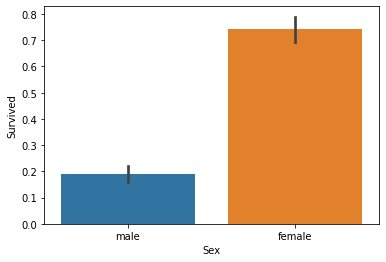

In [11]:
# 성별 생존자 : 막대 그래프
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

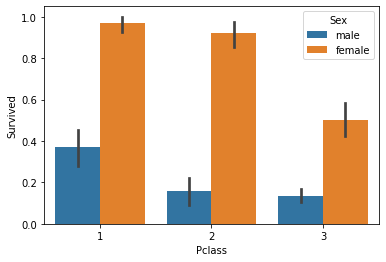

In [12]:
# 객실 등급별/성별 생존 확률
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

In [13]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'unknown'
    elif age <= 5: cat = 'baby'
    elif age <= 12: cat = 'child'
    elif age <= 18: cat = 'teenager'
    elif age <= 25: cat = 'student'
    elif age <= 35: cat = 'young adult'
    elif age <= 60: cat = 'adult'
    else: cat = 'elderly'
        
    return cat

In [14]:
get_category(10)

'child'

In [15]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [16]:

plt.figure(figsize=(10,6))
group_names = ['unkown','baby','child','teenager','young adult','adult','elderly']
titanic_df['age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='age_cat',y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('age_cat',axis=1,inplace=True)

TypeError: '<=' not supported between instances of 'method' and 'int'

<Figure size 720x432 with 0 Axes>

----

# 0723 금

## 데이터 전처리 : 인코딩

### 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
- 인코딩: 사이킷런의 LabelEncoder 클래스 이용해서 레이블 인코딩 적용
- 0~(카테고리 유형수 -1) 숫자 값으로 변환
- fit()/transform()메서드 사용

In [19]:
from sklearn import preprocessing

# 레이블 인코딩 함수
def encode_features(dataDF):
    # 문자열 카테고리 피처
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


## 데이터 전처리 : 삭제
- Passengerld, Name, Ticket 변수 삭제
- drop(labels=None, axis=0, inplace=False) 함수 사용

In [ ]:
# 불필요한 변수 제거 drop()함수 : PassengerId, Name, Ticket 변수

titanic_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
titanic_df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['Passengerld','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

### 생존자 예측 프로세스

#### 1단계. 데이터 로딩
- 피처 데이터셋, 레이블 데이터셋 추출

In [ ]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('C:/Users/wnsgh/Desktop/지해 빅데이터 공부/0721_머신러닝_이경미교수님/01_code 실습/titanic_train.csv')
# 결정값
y_titanic_df = titanic_df['Survived']
# 학습 데이터 세트
# 결정값으로 사용할 'Survived' 칼럼 제외
X_titanic_df= titanic_df.drop('Survived',axis=1)

### 2단계. 데이터 전처리
- 피처 데이터 세트에 transfrom_features()를 적용해 데이터 가공

In [ ]:
X_titanic_df = transform_features(X_titanic_df)
X_titanic_df.head(5)

### 3단계. Data Split : 학습 데이터/테스트 데이터

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

### 4단계. 분류 알고리즘을 적용한 학습/예측/평가

사이킷런 클래스
- 결정 트리 : DecisionTreeClassifier
- 랜덤 포레스트 : RandomForestClassifier
- 로지스틱 회귀: LogisticRegression

train_test_split()으로 분리한 학습 데이터와 테스트 데이터를 기반으로
- 머신러닝 모델을 학습하고(fit), 예측 수행(predict)
- 예측 성능 평가 : 정확도 (accuracy_score()) 사용

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, 랜덤포레스트, 로지스틱회귀를 위한 estimator 객체 생성
dt_clf = DecisionTreeClassifier(random_state=12)
rf_clf = RandomForestClassifier(random_state=12)
lr_clf = LogisticRegression()

# 결정트리 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('결정트리의 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# 랜덤포레스트 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('랜덤포레스트의 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# 로지스틱회귀 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('로지스틱회귀의 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


### 5단계. 교차 검증을 통한 모델 성능 향상
:결정 트리 모델 좀 더 평가

- 사이킷런 model_selection 패키지의 KFold 클래스, cross_val_score(),GridSearchCV 사용

In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_n, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
            
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        print('교차검증 %d : %f' %(iter_n, accuracy))
            
    mean_accuracy = np.mean(scores)
    print('평균 정확도 : %f' % mean_accuracy)
    
exec_kfold(dt_clf, folds=5)

In [ ]:
X_titanic_df.head(3) # 피처 데이터 세트 확인

In [ ]:
X_titanic_df.values[0] # 인덱스 값 출력 train_index가 0인 경우

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

for train_index, test_index in kfold.split(X_titanic_df):
    print(train_index, test_index)

In [ ]:
# cross_val_score()를 이용해 교차 검증 수행
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_n, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도:{1:.4f}'.format(iter_n, accuracy))
    
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

## 6단계 : 하이퍼파라미터 튜닝

GridSearchCV 클래스를 이용해 하이퍼 파리미터를 튜닝

DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 에측 성능 측정
CV : 5개의 폴드 세트 지정
하이퍼 파라미터 : max_depth, min_samples_split, min_samples_leaf 

In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 설정
parameters = {'max_depth':[2, 3, 5, 10],
              'min_samples_split':[2, 3, 5], 
              'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))